In [2]:
from __future__ import print_function
#%matplotlib inline
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from Generator import Generator

In [3]:
ngpu = 1
# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")
# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64
# Create the generator
netG = Generator(ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))

netG.load_state_dict(torch.load('G_500_large.ckpt', map_location=torch.device('cuda')))

<All keys matched successfully>

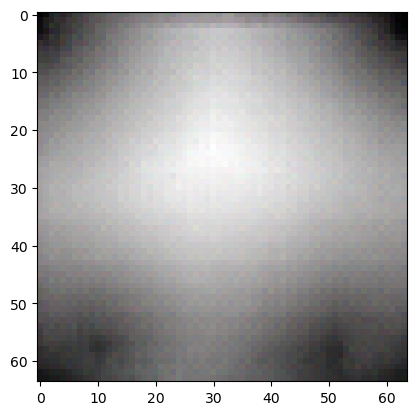

In [126]:
noise = torch.randn(1, nz, 1, 1, device=device)
fake_image = netG(noise).cpu()
#print(fake_image.size())
#print(fake_image)
img_list = []
img_list.append(vutils.make_grid(fake_image, padding=0, normalize=True))
plt.imshow(np.transpose(img_list[-1],(1,2,0)))  #将{c,h,w} change to {h, w, c}
plt.show()

In [127]:
import torchvision

fake_image1 = torchvision.utils.make_grid(fake_image, padding=0, normalize=True)

from torchvision.utils import save_image

save_image(fake_image1,'xinjian13.png')